## Tracer Mass and HCW calculations using xarray

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import xarray as xr


In [16]:
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
grid_file_NoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc'

grid = xr.open_dataset(grid_file)
grid_NoC = xr.open_dataset(grid_file_NoC)


ptracer38 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/ptracersGlob.nc'
ptracer42 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/ptracersGlob.nc'

ptracer37 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run37/ptracersGlob.nc'
ptracer36 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run36/ptracersGlob.nc'
ptracer44 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run44/ptracersGlob.nc'
ptracer45 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run45/ptracersGlob.nc'
ptracer46 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run46/ptracersGlob.nc'
ptracer43 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run43/ptracersGlob.nc'
ptracer51 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run51/ptracersGlob.nc'
ptracer52 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run52/ptracersGlob.nc'

ptracer53 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run53/ptracersGlob.nc'
ptracer41 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run41/ptracersGlob.nc'
ptracer40 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run40/ptracersGlob.nc'
ptracer47 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run47/ptracersGlob.nc'
ptracer48 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run48/ptracersGlob.nc'
ptracer49 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run49/ptracersGlob.nc'
ptracer50 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run50/ptracersGlob.nc'
ptracer54 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run54/ptracersGlob.nc'

ptracer55 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run55/ptracersGlob.nc'
ptracer56 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run56/ptracersGlob.nc'
ptracer57 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run57/ptracersGlob.nc'
ptracer58 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run58/ptracersGlob.nc'
ptracer59 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run59/ptracersGlob.nc'
ptracer60 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run60/ptracersGlob.nc'

ptracer61 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run61/ptracersGlob.nc'
ptracer62 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run62/ptracersGlob.nc'
ptracer63 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run63/ptracersGlob.nc'
ptracer64 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run64/ptracersGlob.nc'
ptracer65 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run65/ptracersGlob.nc'
ptracer66 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run66/ptracersGlob.nc'

ptracer013D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DVISC/run01/ptracersGlob.nc'
ptracer023D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DVISC/run02/ptracersGlob.nc'
ptracer033D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DVISC/run03/ptracersGlob.nc'
ptracer043D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DVISC/run04/ptracersGlob.nc'

ptracer043DDiff = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/ptracersGlob.nc'
ptracer053DDiff = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/ptracersGlob.nc'
ptracer063DDiff = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/ptracersGlob.nc'
ptracer073DDiff = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/ptracersGlob.nc'

ptracer06 = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run06/ptracersGlob.nc' # canyon
ptracer05 = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run05/ptracersGlob.nc' # No canyon

state38 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc' 
state06 = '/ocean/kramosmu/MITgcm/TracerExperiments/EW_OBCS/run06/stateGlob.nc' 


In [3]:
run38 = xr.open_dataset(ptracer38) 
run37 = xr.open_dataset(ptracer37)  
run36 = xr.open_dataset(ptracer36)  
run44 = xr.open_dataset(ptracer44)  
run45 = xr.open_dataset(ptracer45)  
run46 = xr.open_dataset(ptracer46)  
run43 = xr.open_dataset(ptracer43)  
run51 = xr.open_dataset(ptracer51)  
run52 = xr.open_dataset(ptracer52)  

run41 = xr.open_dataset(ptracer41)  
run42 = xr.open_dataset(ptracer42)
run40 = xr.open_dataset(ptracer40)  
run47 = xr.open_dataset(ptracer47)  
run48 = xr.open_dataset(ptracer48)  
run49 = xr.open_dataset(ptracer49)  
run50 = xr.open_dataset(ptracer50)  
run53 = xr.open_dataset(ptracer53)  
run54 = xr.open_dataset(ptracer54)  

run55 = xr.open_dataset(ptracer55)  
run56 = xr.open_dataset(ptracer56)  
run57 = xr.open_dataset(ptracer57)  
run58 = xr.open_dataset(ptracer58)  
run59 = xr.open_dataset(ptracer59)  
run60 = xr.open_dataset(ptracer60)  

run61 = xr.open_dataset(ptracer61)  
run62 = xr.open_dataset(ptracer62)  
run63 = xr.open_dataset(ptracer63)  
run64 = xr.open_dataset(ptracer64)  
run65 = xr.open_dataset(ptracer65)  
run66 = xr.open_dataset(ptracer66)  

run013D = xr.open_dataset(ptracer013D) 
run023D = xr.open_dataset(ptracer023D) 
run033D = xr.open_dataset(ptracer033D) 
run043D = xr.open_dataset(ptracer043D)

run043DDiff = xr.open_dataset(ptracer043DDiff) 
run053DDiff = xr.open_dataset(ptracer053DDiff) 
run063DDiff = xr.open_dataset(ptracer063DDiff) 
run073DDiff = xr.open_dataset(ptracer073DDiff)

run06 = xr.open_dataset(ptracer06)  
run05 = xr.open_dataset(ptracer05)  


In [4]:
def TrOnShelf(Tr,hfacNoC,rA,drF):
  '''
  INPUT----------------------------------------------------------------------------------------------------------------
    Tr    : Array with concentration values for a tracer. Until this function is more general
    hfacNoC : fraction of open cell for NoC case
    rA    : Area of cell faces at C points (HAS TO BE THE SIZE OF XY DOMAIN)
    drF   : Distance between cell faces (90)
    
    OUTPUT----------------------------------------------------------------------------------------------------------------
    Total_Tracer on given domain
                                                
  -----------------------------------------------------------------------------------------------------------------------
  '''

  TrMass  = (hfacNoC*Tr*rA*drF).sum(dim=['Z','Y','X'])
  
  return(TrMass*1000.0)
     
  

In [5]:
trac38 = TrOnShelf(run38.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac37 = TrOnShelf(run37.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac36 = TrOnShelf(run36.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac44 = TrOnShelf(run44.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac45 = TrOnShelf(run45.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac46 = TrOnShelf(run46.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac43 = TrOnShelf(run43.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac51 = TrOnShelf(run51.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac52 = TrOnShelf(run52.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])

trac013D = TrOnShelf(run013D.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac023D = TrOnShelf(run023D.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac033D = TrOnShelf(run033D.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac043D = TrOnShelf(run043D.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])

trac043D = TrOnShelf(run043DDiff.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac053D = TrOnShelf(run053DDiff.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac063D = TrOnShelf(run063DDiff.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac073D = TrOnShelf(run073DDiff.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])

trac42 = TrOnShelf(run42.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac53 = TrOnShelf(run53.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac41 = TrOnShelf(run41.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac40 = TrOnShelf(run40.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac47 = TrOnShelf(run47.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac48 = TrOnShelf(run48.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac49 = TrOnShelf(run49.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac50 = TrOnShelf(run50.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac54 = TrOnShelf(run54.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])

trac55 = TrOnShelf(run55.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac56 = TrOnShelf(run56.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac57 = TrOnShelf(run57.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac58 = TrOnShelf(run58.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac59 = TrOnShelf(run59.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac60 = TrOnShelf(run60.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])

trac61 = TrOnShelf(run61.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac62 = TrOnShelf(run62.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac63 = TrOnShelf(run63.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac64 = TrOnShelf(run64.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac65 = TrOnShelf(run65.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac66 = TrOnShelf(run66.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])

trac06 = TrOnShelf(run06.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])
trac05 = TrOnShelf(run05.Tr1[:,0:30,227:,:],grid_NoC.HFacC[0:30,227:,:],grid_NoC.rA[227:,:],grid_NoC.drF[0:30])


In [6]:
trac38small = TrOnShelf(run38.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac37small = TrOnShelf(run37.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac36small = TrOnShelf(run36.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac44small = TrOnShelf(run44.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac45small = TrOnShelf(run45.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac46small = TrOnShelf(run46.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac43small = TrOnShelf(run43.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac51small = TrOnShelf(run51.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac52small = TrOnShelf(run52.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])

trac013Dsmall = TrOnShelf(run013D.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac023Dsmall = TrOnShelf(run023D.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac033Dsmall = TrOnShelf(run033D.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac043Dsmall = TrOnShelf(run043D.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])

trac043DDiffsmall = TrOnShelf(run043DDiff.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac053DDiffsmall = TrOnShelf(run053DDiff.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac063DDiffsmall = TrOnShelf(run063DDiff.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac073DDiffsmall = TrOnShelf(run073DDiff.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])

trac42small = TrOnShelf(run42.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac53small = TrOnShelf(run53.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac41small = TrOnShelf(run41.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac40small = TrOnShelf(run40.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac47small = TrOnShelf(run47.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac48small = TrOnShelf(run48.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac49small = TrOnShelf(run49.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac50small = TrOnShelf(run50.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac54small = TrOnShelf(run54.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])

trac55small = TrOnShelf(run55.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac56small = TrOnShelf(run56.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac57small = TrOnShelf(run57.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac58small = TrOnShelf(run58.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac59small = TrOnShelf(run59.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac60small = TrOnShelf(run60.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])

trac61small = TrOnShelf(run61.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac62small = TrOnShelf(run62.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac63small = TrOnShelf(run63.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac64small = TrOnShelf(run64.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac65small = TrOnShelf(run65.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac66small = TrOnShelf(run66.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])

trac06small = TrOnShelf(run06.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])
trac05small = TrOnShelf(run05.Tr1[:,0:30,227:300,100:],grid_NoC.HFacC[0:30,227:300,100:],grid_NoC.rA[227:300,100:],grid_NoC.drF[0:30])


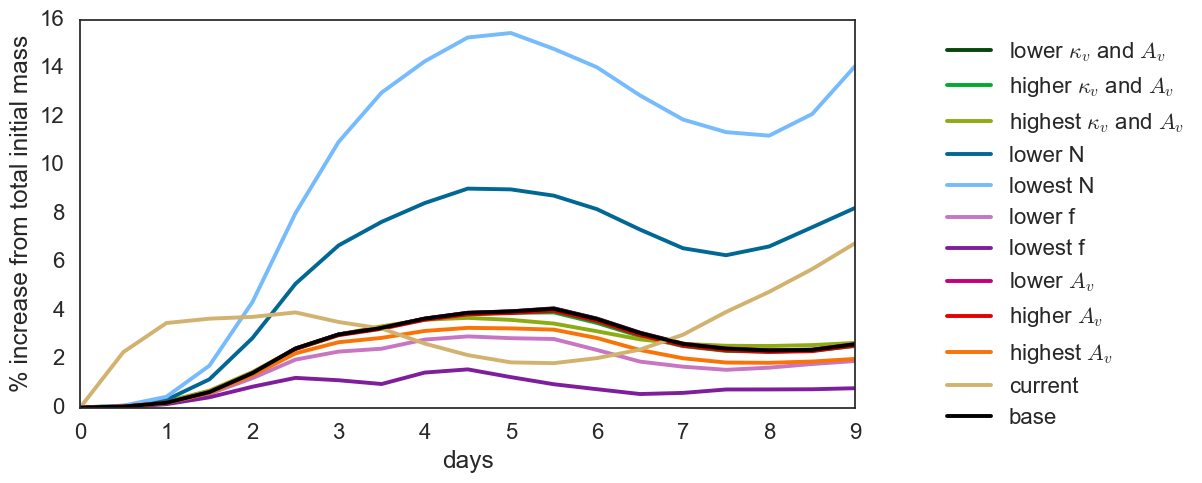

In [7]:
sns.set_context('poster')
sns.set_style('white')

colors = ['forest green',
          'kelly green',
          'pea green',
          'peacock blue',
          'sky blue',
          'orchid',
          'purple'
          ,'magenta',
          'red',
          'orange',
          'tan',
          'black']


labels = ['lower $\kappa_v$ and $A_v$',
          'higher $\kappa_v$ and $A_v$',
          'highest $\kappa_v$ and $A_v$',
          'lower N',
          'lowest N',
          'lower f',
          'lowest f',
          'lower $A_v$',
          'higher $A_v$',
          'highest $A_v$',
          'current',
          'base']

mass_list = [trac43small-trac50small,
             trac37small-trac41small,
             trac36small-trac40small,
             trac44small-trac47small,
             trac46small-trac49small,
             trac51small-trac53small,
             trac52small-trac54small,
             trac55small-trac58small,
             trac56small-trac59small,
             trac57small-trac60small,
             trac06small-trac05small,
             trac38small-trac42small]

mass_list_NoC = [trac50small,
                 trac41small,
                 trac40small,
                 trac47small,
                 trac49small,
                 trac54small,
                 trac53small,
                 trac58small,
                 trac59small,
                 trac60small,
                 trac05small,
                 trac42small]

fig,ax = plt.subplots(1,1,figsize=(10,5))
for mass,mass_NoC,lab,color in zip(mass_list,mass_list_NoC,labels,colors):
    ax.plot(np.arange(19)/2.0,100*mass/mass_NoC,color=sns.xkcd_rgb[color],label=lab)
    
ax.set_xlabel('days')
ax.set_ylabel('% increase from total initial mass')
ax.legend(loc='upper right', bbox_to_anchor=(1.45, 1))

fig.savefig('Mass_small_domain_canyon_effect.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


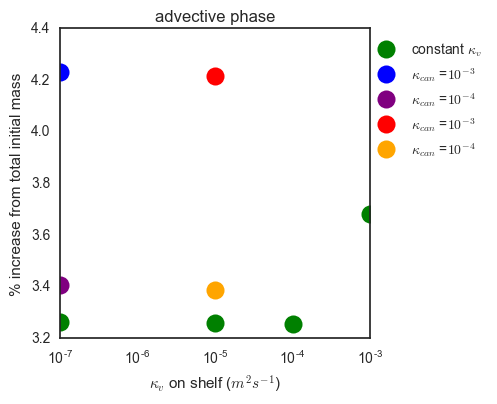

In [8]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

labels = ['','','','constant $\kappa_v$',
          '$\kappa_{can}$ =$10^{-3}$',
          '$\kappa_{can}$ =$10^{-4}$',
          '$\kappa_{can}$ =$10^{-3}$',
          '$\kappa_{can}$ =$10^{-4}$'
         ]

colors = ['green','green','green','green','blue','purple','red','orange']

kv = [1E-7,1E-5,1E-4,1E-3,1E-7,1E-7,1E-5,1E-5]

mass_list = [trac61small-trac64small,trac38small-trac42small,trac62small-trac65small,trac63small-trac66small,
             trac043DDiffsmall-trac64small,trac053DDiffsmall-trac64small,
             trac063DDiffsmall-trac42small,trac073DDiffsmall-trac42small,
             ]

mass_list_NoC = [trac64small,trac42small,trac65small,trac66small,trac64small,trac64small,trac42small,trac42small]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for mass,mass_NoC,lab,color,kv_num in zip(mass_list,mass_list_NoC,labels,colors,kv):
    ax.plot(kv_num,100*(mass[6:]/mass_NoC[0]).mean(),'o',color=color,label=lab, markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$\kappa_v$ on shelf ($m^2s^{-1}$)')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('advective phase')

ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
fig.savefig('Mass_small_domain_canyon_effect_diffusivity_only.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


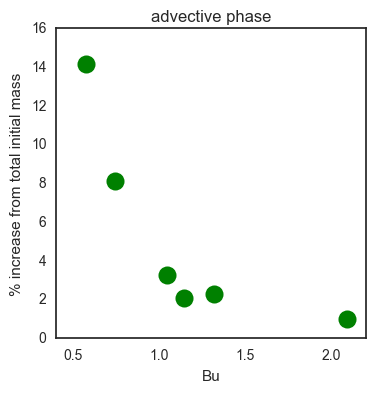

In [9]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)


Hs = 152.5 # m
W = 8300.0 # m
N = np.array([5.5E-3,
              3.9E-3,
              6.0E-3,
              3.0E-3,
              5.5E-3,
              5.5E-3])

f = np.array([9.66E-5,
              9.66E-5,
              9.66E-5,
              9.66E-5,
              7.68E-5,
              4.84E-5])

Bu = (N*Hs)/(f*W)

mass_list = [trac38small-trac42small,
             trac44small-trac47small,
             trac45small-trac48small,
             trac46small-trac49small,
             trac51small-trac53small,
             trac52small-trac54small]

mass_list_NoC = [trac42small,
                 trac47small,
                 trac48small,
                 trac49small,
                 trac53small,
                 trac54small]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for mass,mass_NoC,lab,color,bu in zip(mass_list,mass_list_NoC,labels,colors,Bu):
    ax.plot(bu,100*(mass[6:]/mass_NoC[0]).mean(),'go',markersize=13)

ax.set_xlabel('Bu')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('advective phase')


fig.savefig('Mass_small_domain_canyon_effect_Nf.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


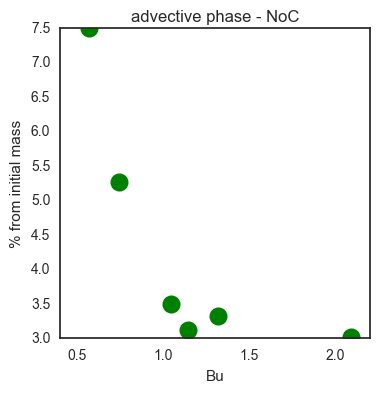

In [10]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)


Hs = 152.5 # m
W = 8300.0 # m
N = np.array([5.5E-3,
              3.9E-3,
              6.0E-3,
              3.0E-3,
              5.5E-3,
              5.5E-3])

f = np.array([9.66E-5,
              9.66E-5,
              9.66E-5,
              9.66E-5,
              7.68E-5,
              4.84E-5])

Bu = (N*Hs)/(f*W)

mass_list_NoC = [trac42small,
                 trac47small,
                 trac48small,
                 trac49small,
                 trac53small,
                 trac54small]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for mass_NoC,lab,color,bu in zip(mass_list_NoC,labels,colors,Bu):
    ax.plot(bu,100*((mass_NoC[6:]-mass_NoC[0])/mass_NoC[0]).mean(),'go',markersize=13)

ax.set_xlabel('Bu')
ax.set_ylabel('% from initial mass')
ax.set_title('advective phase - NoC')


fig.savefig('Mass_small_domain_NoC_Nf.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


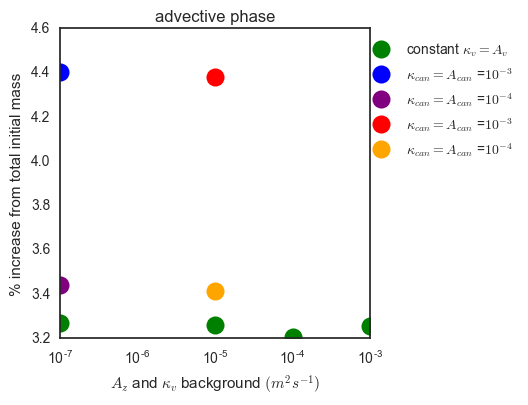

In [11]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

labels = ['','','','constant $\kappa_v=A_v$',
          '$\kappa_{can}= A_{can}$ =$10^{-3}$',
          '$\kappa_{can}= A_{can}$ =$10^{-4}$',
          '$\kappa_{can}= A_{can}$ =$10^{-3}$',
          '$\kappa_{can}= A_{can}$ =$10^{-4}$']

colors = ['green','green','green','green','blue','purple','red','orange']


Az = np.array([1E-3,1E-4,1E-5,1E-7,1E-7,1E-7,1E-5,1E-5])

mass_list = [trac36small-trac40small,trac37small-trac41small,trac38small-trac42small,trac43small-trac50small,
            trac013Dsmall-trac50small,trac023Dsmall-trac50small,trac033Dsmall-trac42small,trac043Dsmall-trac42small,]

mass_list_NoC = [trac40small,trac41small,trac42small,trac50small,trac50small,trac50small,trac42small,trac42small]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for mass,mass_NoC,lab,color,visc in zip(mass_list,mass_list_NoC,labels,colors,Az):
    ax.plot(visc,100*(mass[6:]/mass_NoC[0]).mean(),'o',color=color,markersize=13,label=lab)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$A_z$ and $\kappa_v$ background $(m^2s^{-1})$')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('advective phase')

ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
fig.savefig('Mass_small_domain_canyon_effect_Av_and_Kv.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


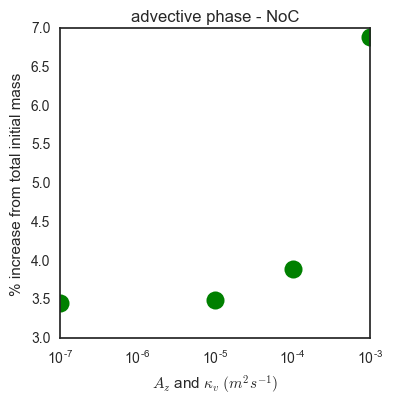

In [12]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)


Az = np.array([1E-3,1E-4,1E-5,1E-7])

mass_list_NoC = [trac40small,trac41small,trac42small,trac50small]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for mass_NoC,lab,color,visc in zip(mass_list_NoC,labels,colors,Az):
    ax.plot(visc,100*((mass_NoC[6:]-mass_NoC[0])/mass_NoC[0]).mean(),'go',markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$A_z$ and $\kappa_v$ $(m^2s^{-1})$')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('advective phase - NoC')
ax.legend(loc=2)

fig.savefig('Mass_small_domain_NoC_Av_and_Kv.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


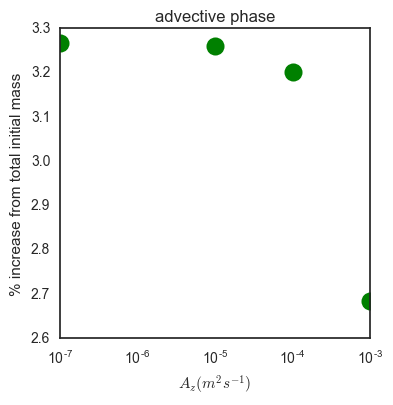

In [13]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)


Az = np.array([1E-7,1E-5,1E-4,1E-3])

mass_list = [trac55small-trac58small,trac38small-trac42small,trac56small-trac59small,trac57small-trac60small]

mass_list_NoC = [trac58small,trac42small,trac59small,trac60small]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for mass,mass_NoC,lab,color,visc in zip(mass_list,mass_list_NoC,labels,colors,Az):
    ax.plot(visc,100*(mass[6:]/mass_NoC[0]).mean(),'go',markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$A_z (m^2s^{-1})$')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('advective phase')
ax.legend(loc=2)

fig.savefig('Mass_small_domain_canyon_effect_Av_only.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


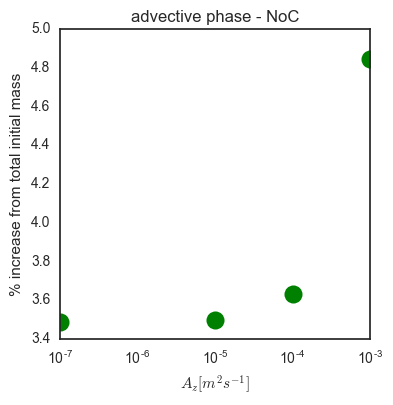

In [14]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)


Az = np.array([1E-7,1E-5,1E-4,1E-3])

mass_list_NoC = [trac58small,trac42small,trac59small,trac60small]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for mass_NoC,lab,color,visc in zip(mass_list_NoC,labels,colors,Az):
    ax.plot(visc,100*((mass_NoC[6:]-mass_NoC[0])/mass_NoC[0]).mean(),'go',markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$A_z [m^2s^{-1}]$')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('advective phase - NoC')
ax.legend(loc=2)

fig.savefig('Mass_small_domain_NoC_Av_only.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


## Prescribed current forcing

In [20]:
state_06 = xr.open_dataset(state06) 
state_38 = xr.open_dataset(state38) 

U06 = state_06.U
U38 = state_38.U

Mean u for base case is (m$s^-1$) 0.295236
Mean u for run06 is (m$s^-1$) 0.362118


/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


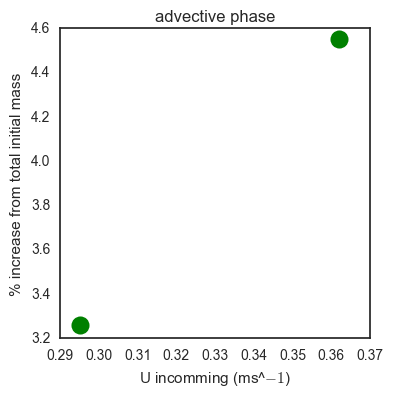

In [23]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

UIn38 = np.nanmean(U38[:,24:26,225:229,120])
UIn06 = np.nanmean(U06[:,24:26,225:229,120])
print('Mean u for base case is (m$s^-1$)', UIn38 )
print('Mean u for run06 is (m$s^-1$)', UIn06 )

U = np.array([UIn38,UIn06])

mass_list = [trac38small-trac42small,trac06small-trac05small]
mass_list_NoC = [trac42small,trac05small]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for mass,mass_NoC,lab,color,vel in zip(mass_list,mass_list_NoC,labels,colors,U):
    ax.plot(vel,100*(mass[6:]/mass_NoC[0]).mean(),'go',markersize=13)

ax.set_xlabel('U incomming (ms^${-1}$)')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('advective phase')
ax.legend(loc=2)

fig.savefig('Mass_small_domain_canyon_effect_forcing.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


Mean u for base case is (m$s^-1$) 0.295236
Mean u for run06 is (m$s^-1$) 0.362118


/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


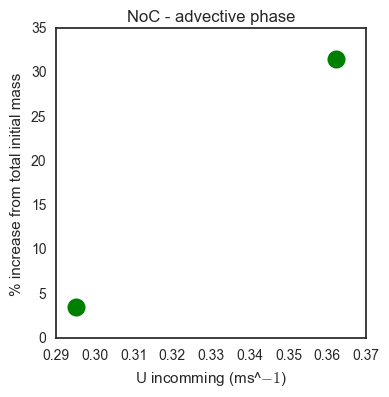

In [25]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

UIn38 = np.nanmean(U38[:,24:26,225:229,120])
UIn06 = np.nanmean(U06[:,24:26,225:229,120])
print('Mean u for base case is (m$s^-1$)', UIn38 )
print('Mean u for run06 is (m$s^-1$)', UIn06 )

U = np.array([UIn38,UIn06])

mass_list = [trac38small-trac42small,trac06small-trac05small]
mass_list_NoC = [trac42small,trac05small]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for mass,mass_NoC,lab,color,vel in zip(mass_list,mass_list_NoC,labels,colors,U):
    ax.plot(vel,100*((mass[]-mass_NoC[0])/mass_NoC[0]).mean(),'go',markersize=13)


ax.set_xlabel('U incomming (ms^${-1}$)')
ax.set_ylabel('% increase from total initial mass')
ax.set_title('NoC - advective phase')
ax.legend(loc=2)

fig.savefig('Mass_small_domain_NoC_forcing.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')
